## Studying the Titanic DataSet

### 1. Wrangling data

#### 1.1 Acquire, first look

First, we import the data and have a general look at it. We have a sample of 891 passengers, but we see that the data is not complete, we are missing 177 age registries, 2 port of embarkment and 687 cabin ones (which could mean the data is missing or the passenger didn't have a cabin). 

A further study of the missing age registries tell us how many of them correspond to each gender and each survival characteristic. These registries are not evenly distributed among those variables, and they represent the 19% of the data to study. We want to analyze and compare several variables, including age, so we decided to ignore the incomplete registries, for they could affect to our results when comparing all the variables. Knowing that it means that our sample is losing almost a 10% of the total passengers (from the 40% to the 32%).



|Sex   |Missing|-|Survived|Missing| 
|------|-------|-|--------|-------|
|female|     53|-|0       |    125| 
|male  |    124|-|1       |     52| 
<center>Missing age registries</center>


|                   | Passengers|% of total|
|-------------------|-----------|----------|
|Total              | 2224      | 100%     |
|Data set           |891        |40%       |
|Complete registries|714        |32%       |
<center>Total percentages of passengers</center>

Among the variables, we want to analyze as dependent variable the passengers' survival, and as independent variables the gender, the age, the passenger class and the port of Embarkment.

In this latter case, the port of Embarkment, we are only missing two registries, which we consider acceptable and we will just ignore that fact for our study as it shouldn't really affect to the results.

#### 1.2 Limitations of our study
Given the fact that the total passengers of the Titanic where 2224, the dataset represents the 40% of the population, but the complete registries represent only the 32% of the population. We have to be very cautious when making conclusions since we are just observing a small amount of the passengers.

Furthermore, we are not carrying out any statistical test to conclude when a variable is statistically significant. We will find relations between variables, but we will not be able to find any causation relation without further study. Our results will only approximate the outcome of the Titanic catastrophe and our conclusions will be based in observation and not mathematical study.

In [1]:
# importing the necessary libraries
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading data and checking the completeness of the dataset
df = pd.read_csv("titanic-data.csv")
print len(df)
df.info()

891
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [3]:
# Taking a look at our data
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [4]:
print "% of uncomplete age in the sample:", 177/891.0
print "% of the population in the sample:",891/ 2224.0
print "% of the population complete registries:",714.0 / 2224

% of uncomplete age in the sample: 0.198653198653
% of the population in the sample: 0.400629496403
% of the population complete registries: 0.321043165468


In [5]:
df[df['Age'].isnull()].groupby('Sex').count()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,,
female,53,53,53,53,0,53,53,53,53,7,53
male,124,124,124,124,0,124,124,124,124,12,124


In [6]:
df[df['Age'].isnull()].groupby('Survived').count()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0,125,125,125,125,0,125,125,125,125,8,125
1,52,52,52,52,0,52,52,52,52,11,52


In [7]:
df[df['Age'].isnull()].groupby(['Pclass']).count()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,30,30,30,30,0,30,30,30,30,16,30
2,11,11,11,11,0,11,11,11,11,1,11
3,136,136,136,136,0,136,136,136,136,2,136


#### 1.3 Data preparation
We delete the colums we are not going to use in the study, in a small dataset like this, removing unused columns is just a matter of cleanliness, and readiness, but in big datasets performance could be improved if we delete the parts we are not going to use.

In [8]:
# DELETING THE COLUMNS WE ARE GOING TO IGNORE
df.drop('SibSp', axis=1, inplace=True)
df.drop('Parch', axis=1, inplace=True)
df.drop('Ticket', axis=1, inplace=True)
df.drop('Fare', axis=1, inplace=True)
df.drop('Cabin', axis=1, inplace=True)
df.drop('Name', axis=1, inplace=True)

In [9]:
# FILLING THE EMBARKED BLANKS FOR NOT DROPING THE REGISTRIES
df.loc[df['Embarked'].isnull(),'Embarked'] = 'Unknown'

In [10]:
# CREATING NEW COLUMNS FOR FACILITATE OUR STUDY
df['male'] = df["Sex"] == "male"
df['female'] = df["Sex"] == "female"
df['first'] = df["Pclass"] == 1
df['second'] = df["Pclass"] == 2
df['third'] = df["Pclass"] == 3
df['survivor'] = df["Survived"] == 1
df['deceased'] = df["Survived"] == 0
df['Cherbourg'] = df["Embarked"] == "C"
df['Queenstown'] = df["Embarked"] == "Q"
df['Southampton'] = df["Embarked"] == "S"

# DELETING THE lines that contain a NaN 
df.dropna(inplace=True)
print len(df)

714


In [11]:
df.head(1)

,PassengerId,Survived,Pclass,Sex,Age,Embarked,male,female,first,second,third,survivor,deceased,Cherbourg,Queenstown,Southampton
0,1,0,3,male,22.0,S,True,False,False,False,True,False,True,False,False,True


### 2. Exploration
#### 2.1 How much did the *passenger class* affect to the survival possibilities of a passenger?

First, we make a graph to get a general idea of the proportion of survivors per passenger class. Within the sample we have, we can see that clearly the 3rd class has the lowest survival possibilities of the three classes. Which could be explained by the fact that 3rd class passengers probably travelled in more crowded conditions at lower levels of the ship, where escaping could have been more difficult than in others areas of the ship.

Then we make the numerical calculations to get the percentages, and as we can see, the highest survival percentage in this sample is shown in first class with the 66%, while the lowest is for third class with only the 24%, an increment of 40 percentage units between first and third class.

|Pclass|survivor|deceased|% survival|
|------|--------|--------|----------|
|1     |122.0	|64.0	 |65.59     |
|2	   |83.0	|90.0	 |47.98     |
|3	   |85.0	|270.0	 |23.94     |
<center>Survival by passenger class</center>


In [12]:
df.groupby('Survived').count()

,PassengerId,Pclass,Sex,Age,Embarked,male,female,first,second,third,survivor,deceased,Cherbourg,Queenstown,Southampton
Survived,,,,,,,,,,,,,,,
0,424,424,424,424,424,424,424,424,424,424,424,424,424,424,424
1,290,290,290,290,290,290,290,290,290,290,290,290,290,290,290


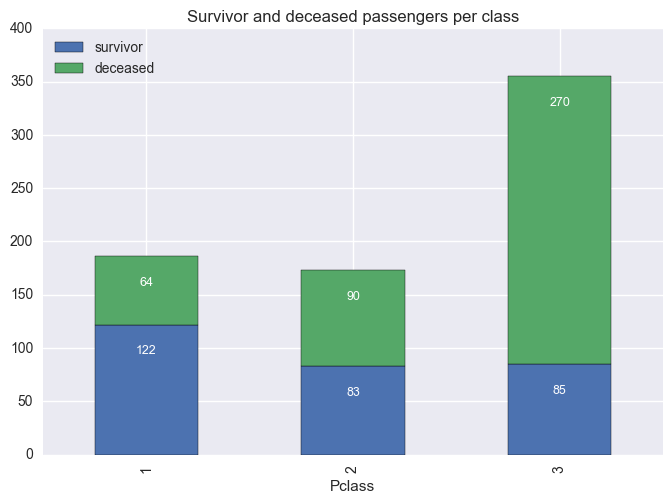

In [13]:
axes = df.groupby("Pclass").sum().plot.bar(y=["survivor","deceased"],stacked=True, title="Survivor and deceased passengers per class")
for p in axes.patches[0:3]:
    axes.text(p.get_x() + p.get_width()/2, # x positions
            p.get_height()-30,             # y position
            int(p.get_height()),           # label text
            ha='center', va='bottom', color='white', fontsize=9) # fontdict with font alignment and properties

for p in axes.patches[3:]:
    lower_i = axes.patches.index(p)
    lower_h = axes.patches[lower_i-3].get_height()
    axes.text(p.get_x() + p.get_width()/2, # x positions
            p.get_height()+lower_h-30,             # y position
            int(p.get_height()),           # label text
            ha='center', va='bottom', color='white', fontsize=9) # fontdict with font alignment and properties

In [14]:
df.groupby('Pclass')['Survived'].agg({'survivor': sum,
                                      'deceased': lambda x:(x==0).sum(),
                                     '% survival': lambda x:x.mean()*100})

,deceased,survivor,% survival
Pclass,,,
1,64,122,65.591398
2,90,83,47.976879
3,270,85,23.943662


#### 2.2 How did the age affect to the survival possibilities?
First, we make a graph to get a general idea of the proportion of survivors per age. Within the sample we have, there is a big amount of deceased people between 20 and 30 years old, but this group is also the largest one in our sample, so we need to have a look at the numbers.

We splitted the passenger sample in three groups, under 20, between 20 and 30 and over 30. The group between 20 and 30 has the smallest probability of survival, only a 36%, but there is not such a big difference with the other two groups. So in the sample we have the age was not an important factor regarding the probabilities of survival.

|                  | %     |
|------------------|-------|
|survivors 20 - 30 |  36.21|
|survivors under 20|  38.88|
|survivors over 30 |  40.92|
<center>Survival by age range</center>

In [15]:
ages = df[['Survived','Age']].copy()
ages['survivor'] = df.loc[df['Survived'] == 1,'Age']
ages['deceased'] = df.loc[df['Survived'] == 0,'Age']
print ages.head(2)

   Survived   Age  survivor  deceased
0         0  22.0       NaN      22.0
1         1  38.0      38.0       NaN


60


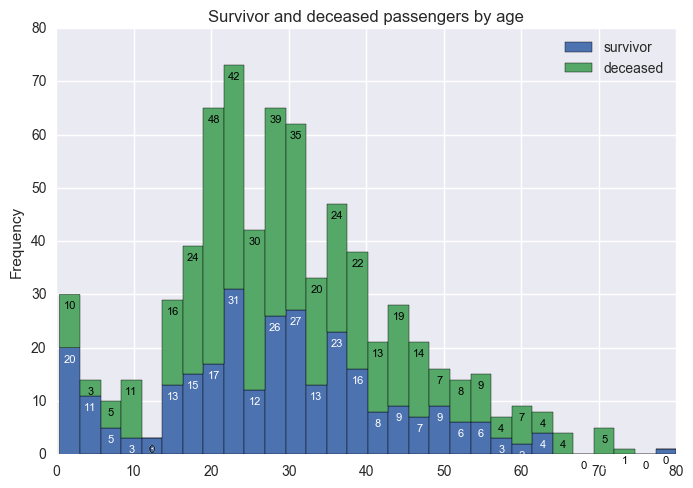

In [16]:
axes = ages[['survivor','deceased']].plot.hist(stacked=True, bins=30, title="Survivor and deceased passengers by age")
print len(axes.patches)
for p in axes.patches[0:30]:
    axes.text(p.get_x() + p.get_width()/2, # x positions
            p.get_height()-3,             # y position
            int(p.get_height()),           # label text
            ha='center', va='bottom', color='white', fontsize=8) # fontdict with font alignment and properties
for p in axes.patches[30:]:
    lower_i = axes.patches.index(p)
    lower_h = axes.patches[lower_i-30].get_height()
    axes.text(p.get_x() + p.get_width()/2, # x positions
            p.get_height()+lower_h-3,             # y position
            int(p.get_height()),           # label text
            ha='center', va='bottom', color='black', fontsize=8) # fontdict with font alignment and properties

In [17]:
pass_20_30 = df[(df['Age'] > 20) & (df['Age'] < 31)]
print "survivors 20 - 30: ",(pass_20_30['Survived'].sum())*100.0/len(pass_20_30)
pass_20 = df[(df['Age'] > 20)]
print "survivors under 20: ",(pass_20['Survived'].sum())*100.0/len(pass_20)
pass_30 = df[(df['Age'] >= 31)]
print "survivors over 30: ",(pass_30['Survived'].sum())*100.0/len(pass_30)

survivors 20 - 30:  36.2068965517
survivors under 20:  38.8785046729
survivors over 30:  40.9240924092


#### 2.3. How did the *gender* affect to the survival possibilities?
First, we make a graph to get a general idea of the proportion of survivors per sex. Within the sample we have, we can see clearly that women survived proportionally much more than men.

If we look at the numbers we can see that a 75% of females survived while only a 21% of males survived, more than 50 percentage units of difference.

|Sex   |survivor|deceased|% survival|
|------|--------|--------|----------|	
|female|197  	|64	     |75.48     |
|male  |93	    |360	 |20.53     |
<center>Survival by gender</center>

This situation could be related with the fact that we know now that the Titanic didn't carry lifeboats for all the passengers and it is possible that they were filled mostly with women and children according to the unofficial code of ["women and children first"](https://en.wikipedia.org/wiki/Women_and_children_first) for maritime disasters. This theory is supported by [Elinder & Erixson's](http://www.pnas.org/content/109/33/13220.abstract) 2012 study in which they also explain that only a 20% of all the males survived. This percentage matches with the one of our sample.

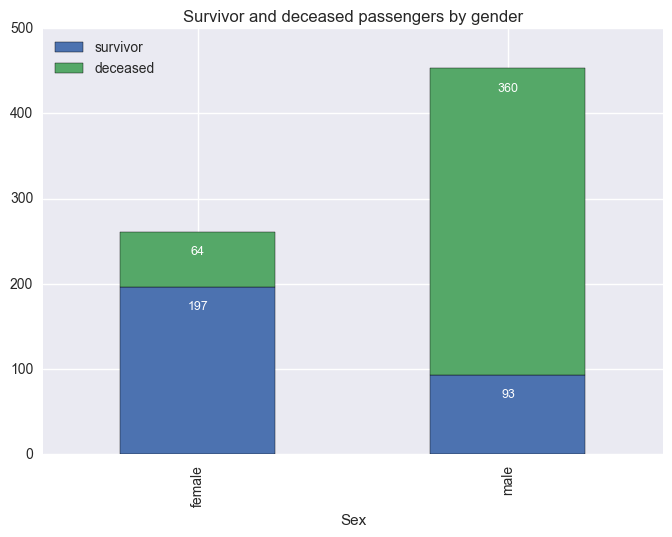

In [18]:
axes = df.groupby("Sex").sum().plot.bar(y=["survivor","deceased"],stacked=True, title="Survivor and deceased passengers by gender")
for p in axes.patches[0:2]:
    axes.text(p.get_x() + p.get_width()/2, # x positions
            p.get_height()-30,             # y position
            int(p.get_height()),           # label text
            ha='center', va='bottom', color='white', fontsize=9) # fontdict with font alignment and properties

for p in axes.patches[2:]:
    lower_i = axes.patches.index(p)
    lower_h = axes.patches[lower_i-2].get_height()
    axes.text(p.get_x() + p.get_width()/2, # x positions
            p.get_height()+lower_h-30,             # y position
            int(p.get_height()),           # label text
            ha='center', va='bottom', color='white', fontsize=9) # fontdict with font alignment and properties

In [19]:
df.groupby("Sex")['Survived'].agg({"survivor": sum,
                                         "deceased": lambda x:(x==0).sum(),
                                         "% survival": lambda x:x.mean()*100})

,deceased,survivor,% survival
Sex,,,
female,64,197,75.478927
male,360,93,20.529801


#### 2.4. Where females proportionally younger or older than males? How *age* and *gender* affected together to the survival possibilities?

First we study the tendency and variability of the ages of males and females. 

|     |mean |median|std  |
|-----|-----|------|-----|
|WOMEN|27.91| 27.0 |14.11|
|MEN  |30.73| 29.0 |14.68|
<center>Study of passengers ages</center>

In both cases the distribution of ages look very similar which means between 27 and 31 and very similar standard deviations. We also represent the distribution of ages graphically with a boxplot and a histogram. Attending to these results we cannot say that female and male survival differences was affected by its age, being both age distributions very similar for males and females. 

We also represent the distribution of survivors by gender and age and we can see that in almost all the cases surviving possibilities for men were much lower than for women. 

Finally we calculate the percentage of survival in the "critical age" between 20 and 30 years, and we can see that in that range male survival is even less than for the whole sample (a difference of almost 60 percentage units between male and females):

|                        |     %   |
|------------------------|---------|
|female survivors 20 - 30|  74.39  |
|male survivors 20 - 30  |  15.33  |
<center>Survival for male and female on the 20-30 age range </center>

We can say that being male and between 20 and 30 years old was the worst combination of age and gender regarding  survival possibilities in the Titanic.

In [20]:
ages_sex = df[['Sex','Age']].copy()
ages_sex['male'] = df.loc[df['Sex'] == 'male','Age']
ages_sex['female'] = df.loc[df['Sex'] == 'female','Age']
ages_sex.head(2)

,Sex,Age,male,female
0,male,22.0,22.0,NaN
1,female,38.0,NaN,38.0


In [21]:
print "WOMEN"
print "mean:",ages_sex['female'].mean()
print "median:",ages_sex['female'].median()
print "std:",ages_sex['female'].std()
print "MEN"
print "mean:",ages_sex['male'].mean()
print "median:",ages_sex['male'].median()
print "std:",ages_sex['male'].std()

WOMEN
mean: 27.9157088123
median: 27.0
std: 14.1101464575
MEN
mean: 30.7266445916
median: 29.0
std: 14.6782008238


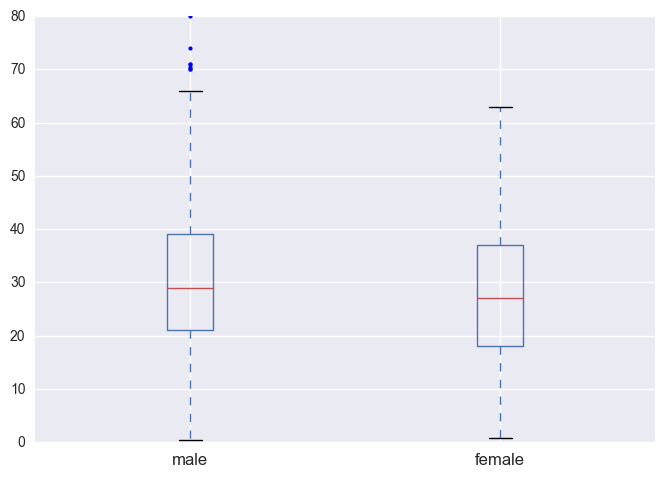

In [22]:
ages_sex[['male',"female"]].boxplot(sym=".")


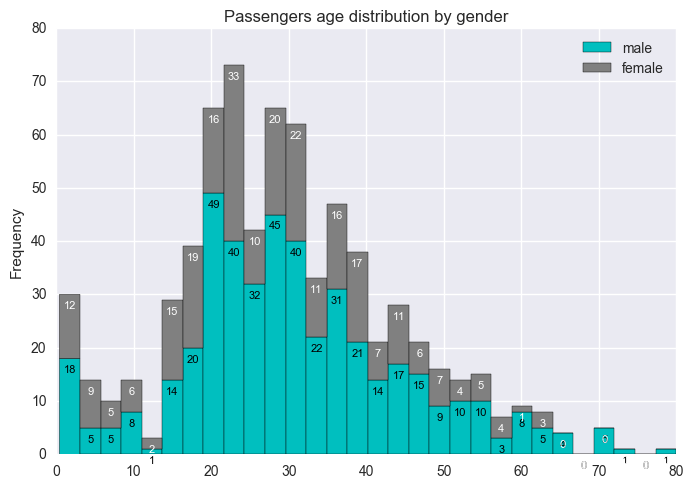

In [23]:
axes = ages_sex[['male','female']].plot.hist(stacked=True, bins=30, color=["c","grey"], title='Passengers age distribution by gender')
for p in axes.patches[0:30]:
    axes.text(p.get_x() + p.get_width()/2, # x positions
            p.get_height()-3,             # y position
            int(p.get_height()),           # label text
            ha='center', va='bottom', color='black', fontsize=8) # fontdict with font alignment and properties
for p in axes.patches[30:]:
    lower_i = axes.patches.index(p)
    lower_h = axes.patches[lower_i-30].get_height()
    axes.text(p.get_x() + p.get_width()/2, # x positions
            p.get_height()+lower_h-3,             # y position
            int(p.get_height()),           # label text
            ha='center', va='bottom', color='white', fontsize=8) # fontdict with font alignment and properties

In [24]:
ages_sex_s = df.loc[df['Survived'] == 1,['Sex','Age']].copy()
ages_sex_s['male'] = df.loc[df['Sex'] == 'male','Age']
ages_sex_s['female'] = df.loc[df['Sex'] == 'female','Age']
ages_sex_s.head(2)

,Sex,Age,male,female
1,female,38.0,NaN,38.0
2,female,26.0,NaN,26.0


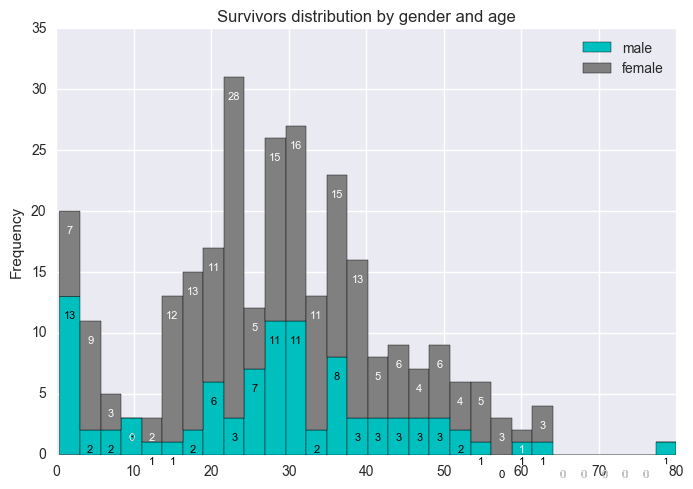

In [25]:
axes = ages_sex_s[['male','female']].plot.hist(stacked=True, bins=30, color=["c","grey"], title="Survivors distribution by gender and age")
for p in axes.patches[0:30]:
    axes.text(p.get_x() + p.get_width()/2, # x positions
            p.get_height()-2,             # y position
            int(p.get_height()),           # label text
            ha='center', va='bottom', color='black', fontsize=8) # fontdict with font alignment and properties
for p in axes.patches[30:]:
    lower_i = axes.patches.index(p)
    lower_h = axes.patches[lower_i-30].get_height()
    axes.text(p.get_x() + p.get_width()/2, # x positions
            p.get_height()+lower_h-2,             # y position
            int(p.get_height()),           # label text
            ha='center', va='bottom', color='white', fontsize=8) # fontdict with font alignment and properties

In [26]:
pass_20_30_f = df[(df['Age'] > 20) & (df['Age'] < 31) & (df['Sex']=='female')]
print "female survivors 20 - 30: ",(pass_20_30_f['Survived'].sum())*100.0/len(pass_20_30_f)
pass_20_30_m = df[(df['Age'] > 20) & (df['Age'] < 31)& (df['Sex']=='male')]
print "male survivors 20 - 30: ",(pass_20_30_m['Survived'].sum())*100.0/len(pass_20_30_m)

female survivors 20 - 30:  74.3902439024
male survivors 20 - 30:  15.3333333333


#### 2.5. Where there more females or males in each passenger class? Could both variables, *gender* and *class*, affect differently together than separately to the survival possibilities?
We first plot the gender distribution of passengers per class in this sample and we can see that definitely the distribution is not even, a great proportion of males were travelling in third class.

We calculate the proportion of survival for both males and females in every class:
	  
|Pclass| male |	female|	% male  |% female | % m surv|% f surv |
|------|------|-------|---------|---------|---------|---------|
|1	   |101.0 |	85.0  |54.30	|45.70    |39.60	|96.47    |
|2	   |99.0  |	74.0  |57.23	|42.77	  |15.15	|91.90    |
|3	   |253.0 | 102.0 |71.27	|28.73	  |15.02	|46.08    |
<center>Survival by gender and class</center>


If we compare it with the global survival possibilities by gender:


|Sex   |survivor|deceased|% survival|
|------|--------|--------|----------|	
|female|197  	|64	     |75.48     |
|male  |93	    |360	 |20.53     |
<center>Survival by gender</center>


And the percentages of survival by class:


|Pclass|survivor|deceased|% survival|
|------|--------|--------|----------|
|1     |122.0	|64.0	 |65.59     |
|2	   |83.0	|90.0	 |47.98     |
|3	   |85.0	|270.0	 |23.94     |
<center>Survival by passenger class</center>

We can see that given the sample we have, the proportion of survivor females (75%) increments in 20 percentage units if the female was traveling in first or second class, but decreases 30 percentage units if she was travelling in third class. Regarding males, travelling in first class increments the proportion of survivors (from 21% to 39%) in almost 20 percentage units, but travelling in second or third class decreases in 5 percentage points the proportion of survivors. For every class, the proportion of females survivors is much higher than male survivors, being the biggest difference in percentage points between females and males in the second class. 

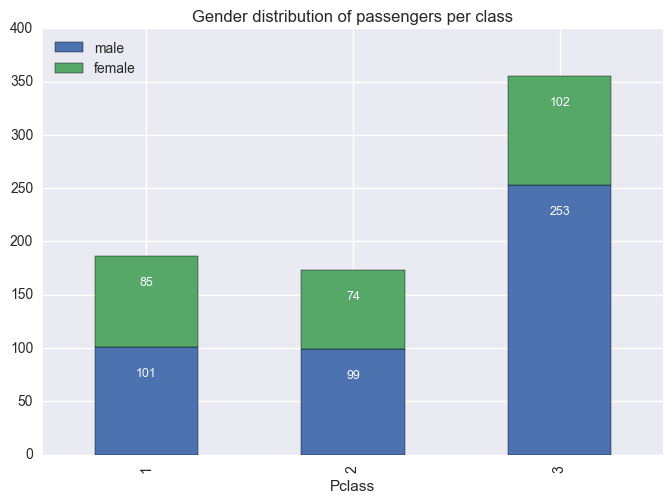

In [27]:
axes = df.groupby(["Pclass"]).sum().plot.bar(y=["male","female"],stacked=True, title="Gender distribution of passengers per class")
for p in axes.patches[0:3]:
    axes.text(p.get_x() + p.get_width()/2, # x positions
            p.get_height()-30,             # y position
            int(p.get_height()),           # label text
            ha='center', va='bottom', color='white', fontsize=9) # fontdict with font alignment and properties

for p in axes.patches[3:]:
    lower_i = axes.patches.index(p)
    lower_h = axes.patches[lower_i-3].get_height()
    axes.text(p.get_x() + p.get_width()/2, # x positions
            p.get_height()+lower_h-30,             # y position
            int(p.get_height()),           # label text
            ha='center', va='bottom', color='white', fontsize=9) # fontdict with font alignment and properties

In [28]:
sum_class = df.groupby("Pclass").sum().loc[:, ["male", "female"]]
sum_class["% male"] = (sum_class['male']/(sum_class['male']+sum_class['female'])) * 100
sum_class["% female"] = (sum_class['female']/(sum_class['male']+sum_class['female'])) * 100
sum_class

,male,female,% male,% female
Pclass,,,,
1,101.0,85.0,54.301075,45.698925
2,99.0,74.0,57.225434,42.774566
3,253.0,102.0,71.267606,28.732394


In [29]:
surv_gender_class = df.groupby(["Pclass","Sex","Survived"])['PassengerId'].count()
print surv_gender_class

Pclass  Sex     Survived
1       female  0             3
                1            82
        male    0            61
                1            40
2       female  0             6
                1            68
        male    0            84
                1            15
3       female  0            55
                1            47
        male    0           215
                1            38
Name: PassengerId, dtype: int64


In [30]:
fem_0 = (surv_gender_class.loc[
        (slice(None),'female',0)]).values
fem_1 = (surv_gender_class.loc[
        (slice(None),'female',1)]).values
mal_0 = (surv_gender_class.loc[
        (slice(None),'male',0)]).values
mal_1 = (surv_gender_class.loc[
        (slice(None),'male',1)]).values

sum_class['% m surv'] = mal_1 * 100.0 / (mal_0 + mal_1)
sum_class['% f surv'] = fem_1 * 100.0 / (fem_0 + fem_1)
sum_class

,male,female,% male,% female,% m surv,% f surv
Pclass,,,,,,
1,101.0,85.0,54.301075,45.698925,39.603960,96.470588
2,99.0,74.0,57.225434,42.774566,15.151515,91.891892
3,253.0,102.0,71.267606,28.732394,15.019763,46.078431


#### 2.6. Is there any relation between the port of embarkment and the survival possibilities?
Firt, we make a graph to get a general idea of the proportion of survivors per embarkment port as well as the proportion of each passenger class that embarked on each port. Southampton is by far the port where most people of the current sample embarked. We can see a higher proportion of deceases among passengers who embarked at Southampton and Queenstown comparing to those embarked at Cherbourg, but also that the majority of the Southampton and Queenstown passengers travelled in third class.

|Embarked	|survivor|deceased|	% survival |
|-----------|--------|--------|------------|		
|Cherbourg  |79.0	 |51.0	  |60.77       |
|Queenstown	|8.0	 |20.0	  |28.57       |
|Southampton|201.0	 |353.0	  |36.28       |
|Unknown	|2.0	 |0.0	  |100.00      |
<center>Survival by embarkment port</center>

Only a 29% and a 36% of this sample passengers that embarked at Queenstown and Southampton survived, what could be related to the class they were travelling in. Still, if we study the survival percentage of 3rd class passengers embarked at each of the port we see that Cherbourg has a better survival percentage. The limitations of our study doesn't allow us to draw conclusions out of the embarkment port, these numbers could be due to chance. We would need a further study and know more variables to determine if the port o embarkment really affect to the survival likelihood.

|3rd class Embarked	|survivor|deceased|	% survival |
|-------------------|--------|--------|------------|		
|Cherbourg          |18.0	 |23.0	  |43.90       |
|Queenstown	        |6.0	 |18.0	  |25.00       |
|Southampton        |61.0	 |229.0	  |21.03       |
<center>Survival of 3rd class passengers by embarkment port</center>



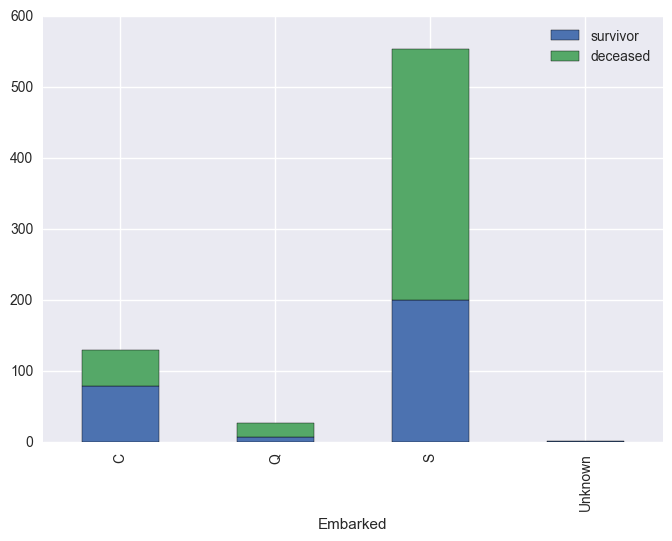

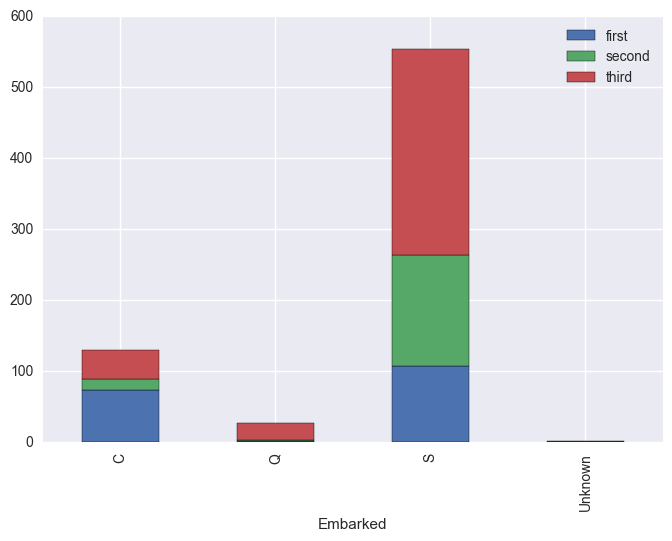

In [31]:
df.groupby("Embarked").sum().plot.bar(y=["survivor","deceased"],stacked=True)
df.groupby("Embarked").sum().plot.bar(y=["first","second","third"],stacked=True)

In [32]:
sum_emb = df.groupby(["Embarked"]).sum().loc[:, ["survivor", "deceased"]]
sum_emb["% survival"] = (sum_emb['survivor']/(sum_emb['survivor']+sum_emb['deceased'])) * 100
sum_emb

,survivor,deceased,% survival
Embarked,,,
C,79.0,51.0,60.769231
Q,8.0,20.0,28.571429
S,201.0,353.0,36.281588
Unknown,2.0,0.0,100.000000


In [33]:
sum_emb = df.groupby(["Embarked","Pclass"]).sum().loc[:, ["survivor", "deceased"]]
sum_emb["% survival"] = (sum_emb['survivor']/(sum_emb['survivor']+sum_emb['deceased'])) * 100
sum_emb

survivor  deceased  % survival
Embarked Pclass                                
C        1           53.0      21.0   71.621622
         2            8.0       7.0   53.333333
         3           18.0      23.0   43.902439
Q        1            1.0       1.0   50.000000
         2            1.0       1.0   50.000000
         3            6.0      18.0   25.000000
S        1           66.0      42.0   61.111111
         2           74.0      82.0   47.435897
         3           61.0     229.0   21.034483
Unknown  1            2.0       0.0  100.000000

### 3. Conclusions

As we stated in the "limitations" chapter our conclusions are based in observation, not in mathematical study, so we cannot assure if the relations we are observing between our variables are due to chance or not. We cannot assure any causation relation between them, we can just observe the numbers and try to find logical explanations and patterns.

Attending to the percentages, the gender is the variable that affects alone the most to the survival probabilities (around 55 percentage units of difference) of these sample passengers, but that difference increments when considering both gender and class (80 percentage points between males in third class and females in first class). The age alone doesn't seem to affect the survival capabilities. 

Our guessed explanation of females surviving more due to the unofficial code of ["women and children first"](https://en.wikipedia.org/wiki/Women_and_children_first) for maritime disasters looses strenght if children didn't survived more than adults. We could also discuss what was a "children" at that time, since from our graphs we can see that most of the passengers under 10 years old survived but most of the 10 year old children didn't. Definitely, in a catastrophe like this, the amount of variables to take into account make it difficult to make assertions without combining them all.

A further study could try to combine more variables (gender, age and class together for example) and also add new ones like the price paid for the ticket, or the fact of having a cabin and a family on board. Also, ages could be analyzed in smaller ranges to deeply study the differences among the groups.

Regarding the limitations of working with a small sample, giving that the 2012 study by [Elinder & Erixson's](http://www.pnas.org/content/109/33/13220.abstract) stated that only a 20% of all the males survived. We can say that at least the gender variable of our sample is similar to the one of the whole population.

These results match the initial expectations, women and 1st and 2nd class passengers being the ones with more chances to survive, and men between their 20s and 30s the ones with less chances. Still, the high differences in percentage points that we have found were a little bit surprising.

|Pclass|survivor|deceased|% survival|
|------|--------|--------|----------|
|1     |122.0	|64.0	 |65.59     |
|2	   |83.0	|90.0	 |47.98     |
|3	   |85.0	|270.0	 |23.94     |
<center>Survival by passenger class</center>

|                  | %     |
|------------------|-------|
|survivors 20 - 30 |  36.21|
|survivors under 20|  38.88|
|survivors over 30 |  40.92|
<center>Survival by age range</center>

|Sex   |survivor|deceased|% survival|
|------|--------|--------|----------|	
|female|197  	|64	     |75.48     |
|male  |93	    |360	 |20.53     |
<center>Survival by gender</center>


|     |mean |median|std  |
|-----|-----|------|-----|
|WOMEN|27.91| 27.0 |14.11|
|MEN  |30.73| 29.0 |14.68|
<center>Study of passengers ages</center>

|                        |     %   |
|------------------------|---------|
|female survivors 20 - 30|  74.39  |
|male survivors 20 - 30  |  15.33  |
<center>Survival for male and female on the 20-30 age range </center>


|Pclass| male |	female|	% male  |% female | % m surv|% f surv |
|------|------|-------|---------|---------|---------|---------|
|1	   |101.0 |	85.0  |54.30	|45.70    |39.60	|96.47    |
|2	   |99.0  |	74.0  |57.23	|42.77	  |15.15	|91.90    |
|3	   |253.0 | 102.0 |71.27	|28.73	  |15.02	|46.08    |
<center>Survival by gender and class</center>


|Embarked	|survivor|deceased|	% survival |
|-----------|--------|--------|------------|		
|Cherbourg  |79.0	 |51.0	  |60.77       |
|Queenstown	|8.0	 |20.0	  |28.57       |
|Southampton|201.0	 |353.0	  |36.28       |
|Unknown	|2.0	 |0.0	  |100.00      |
<center>Survival by embarkment port</center>
